In [1]:
# Importing Packages 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics


%matplotlib inline
plt.rcParams['font.size'] = 14


In [2]:
df = pd.read_excel("GenData.xlsx", sheet_name= "Sales Data")
df.head()

,StoreCode,Shift,DayType,Day,Month,Date,Year,Time,TicketCode,PartySize,MenuCateogry,MenuItem,ItemPrice,ItemQty
0,YALEV6B6K3,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4,Starter,GOBI MANCHURIAN,14.0,1
1,YALEV6B6K3,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4,Starter,TASTY FLATBREAD,11.0,1
2,YALEV6B6K3,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4,VEGETABLE SPECIALS,SARSON DA SAAG,15.0,1
3,YALEV6B6K3,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4,VEGETABLE SPECIALS,PANEER VINDALOO,16.0,1
4,YALEV6B6K3,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4,BREADS,GARLIC NAAN,3.5,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11340 entries, 0 to 11339
Data columns (total 14 columns):
StoreCode       11340 non-null object
Shift           11340 non-null object
DayType         11340 non-null object
Day             11340 non-null object
Month           11340 non-null int64
Date            11340 non-null int64
Year            11340 non-null int64
Time            11340 non-null object
TicketCode      11340 non-null object
PartySize       11340 non-null int64
MenuCateogry    11340 non-null object
MenuItem        11340 non-null object
ItemPrice       11340 non-null float64
ItemQty         11340 non-null int64
dtypes: float64(1), int64(5), object(8)
memory usage: 1.2+ MB


In [4]:
df.isnull().sum()

StoreCode       0
Shift           0
DayType         0
Day             0
Month           0
Date            0
Year            0
Time            0
TicketCode      0
PartySize       0
MenuCateogry    0
MenuItem        0
ItemPrice       0
ItemQty         0
dtype: int64

In [5]:
df.head(10)

,StoreCode,Shift,DayType,Day,Month,Date,Year,Time,TicketCode,PartySize,MenuCateogry,MenuItem,ItemPrice,ItemQty
0,YALEV6B6K3,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4,Starter,GOBI MANCHURIAN,14.00,1
1,YALEV6B6K3,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4,Starter,TASTY FLATBREAD,11.00,1
2,YALEV6B6K3,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4,VEGETABLE SPECIALS,SARSON DA SAAG,15.00,1
3,YALEV6B6K3,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4,VEGETABLE SPECIALS,PANEER VINDALOO,16.00,1
4,YALEV6B6K3,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4,BREADS,GARLIC NAAN,3.50,2
5,YALEV6B6K3,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4,BREADS,NAAN,2.75,2
6,YALEV6B6K3,Lunch,Weekday,Tuesday,1,1,2019,11:40AM,YALE0002,3,Starter,MASALA CHICKEN WINGS,14.00,1
7,YALEV6B6K3,Lunch,Weekday,Tuesday,1,1,2019,11:40AM,YALE0002,3,Starter,COCKTAIL CHICKEN SAMOSAS,14.00,1
8,YALEV6B6K3,Lunch,Weekday,Tuesday,1,1,2019,11:40AM,YALE0002,3,CHICKEN SPECIALS,CHICKEN KORMA,18.00,1
9,YALEV6B6K3,Lunch,Weekday,Tuesday,1,1,2019,11:40AM,YALE0002,3,RICE SPECIALS,CHICKEN BIRYANI,19.00,1


In [6]:
# Dropping the DayType (Day_Type is a recoding of Day) and Year (same year) columns

df = df.drop(['DayType', 'Year'], axis=1) 

In [7]:
df.MenuItem.unique()

array(['GOBI MANCHURIAN', 'TASTY FLATBREAD', 'SARSON DA SAAG',
       'PANEER VINDALOO', 'GARLIC NAAN', 'NAAN', 'MASALA CHICKEN WINGS',
       'COCKTAIL CHICKEN SAMOSAS', 'CHICKEN KORMA', 'CHICKEN BIRYANI',
       'ONION KULCHA', 'CHICKEN TIKKA MASALA', 'GULABJAMUN', 'MALPURA',
       'VEGETABLE SAMOSA', 'CHAAT PAPRI', 'BAINGAN BARTHA', 'MALAI KOFTA',
       'CHICKEN SAAG', 'RICE', 'TANDOORI ROTI', 'CARROT HALWA',
       'KADAHI PANEER', 'KADAHI LAMB', 'ALOO PARATHA', 'RASMALAI',
       'VEGETABLE PAKORA', 'HARA BHARA KABOB', 'SHAHI PANEER',
       'YELLOW DAL FRY', 'BHINDI DO PIAZZA', 'COCONUT CHICKEN CURRY',
       'BUTTER CHICKEN', 'LACHA PARATHA', 'FISH PAKORA', 'SHRIMP STRIPS',
       'FISH KORMA', 'FISH CURRY', 'KHEER',
       'TASTY SLIDERS : CHICKEN PANEER', 'SPICY CHICKEN BITES',
       'TIKKA RICE BOWL : PANEER | CHICKEN', 'SPINACH NAAN'], dtype=object)

In [8]:
df.ItemPrice.unique()

array([14.  , 11.  , 15.  , 16.  ,  3.5 ,  2.75, 18.  , 19.  ,  5.  ,
        6.  ,  8.  ,  7.  ])

In [ ]:
df.head()

,StoreCode,Shift,Day,Month,Date,Time,TicketCode,PartySize,MenuCateogry,MenuItem,ItemPrice,ItemQty
0,YALEV6B6K3,Lunch,Tuesday,1,1,11:30AM,YALE0001,4,Starter,GOBI MANCHURIAN,14.0,1
1,YALEV6B6K3,Lunch,Tuesday,1,1,11:30AM,YALE0001,4,Starter,TASTY FLATBREAD,11.0,1
2,YALEV6B6K3,Lunch,Tuesday,1,1,11:30AM,YALE0001,4,VEGETABLE SPECIALS,SARSON DA SAAG,15.0,1
3,YALEV6B6K3,Lunch,Tuesday,1,1,11:30AM,YALE0001,4,VEGETABLE SPECIALS,PANEER VINDALOO,16.0,1
4,YALEV6B6K3,Lunch,Tuesday,1,1,11:30AM,YALE0001,4,BREADS,GARLIC NAAN,3.5,2


In [ ]:
df.columns

Index(['StoreCode', 'Shift', 'Day', 'Month', 'Date', 'Time', 'TicketCode',
       'PartySize', 'MenuCateogry', 'MenuItem', 'ItemPrice', 'ItemQty'],
      dtype='object')

# dtype transform

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# dtype transform
df.StoreCode = le.fit_transform(df.StoreCode)
df.Shift = le.fit_transform(df.Shift)
df.Day = le.fit_transform(df.Day)
df.MenuCateogry = le.fit_transform(df.MenuCateogry)
df.TicketCode = le.fit_transform(df.TicketCode)
df.MenuItem = le.fit_transform(df.MenuItem)
df.Time = le.fit_transform(df.Time)

In [ ]:
df.head()

,StoreCode,Shift,Day,Month,Date,Time,TicketCode,PartySize,MenuCateogry,MenuItem,ItemPrice,ItemQty
0,0,1,5,1,1,0,0,4,6,16,14.0,1
1,0,1,5,1,1,0,0,4,6,37,11.0,1
2,0,1,5,1,1,0,0,4,7,31,15.0,1
3,0,1,5,1,1,0,0,4,7,28,16.0,1
4,0,1,5,1,1,0,0,4,0,15,3.5,2


# Pairplot Visualisation

Create some Seaborn pairplots for the features ('StoreCode', 'Shift', 'Day', 'Month', 'Date', 'Time', 'TicketCode','PartySize', 'MenuCateogry', 'MenuItem', 'ItemPrice', 'ItemQty') to get a feel for how the various features are distributed vis-a-vis the ItemQty as well as the number of MenuItem

C:\Users\RetailAdmin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\RetailAdmin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\RetailAdmin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


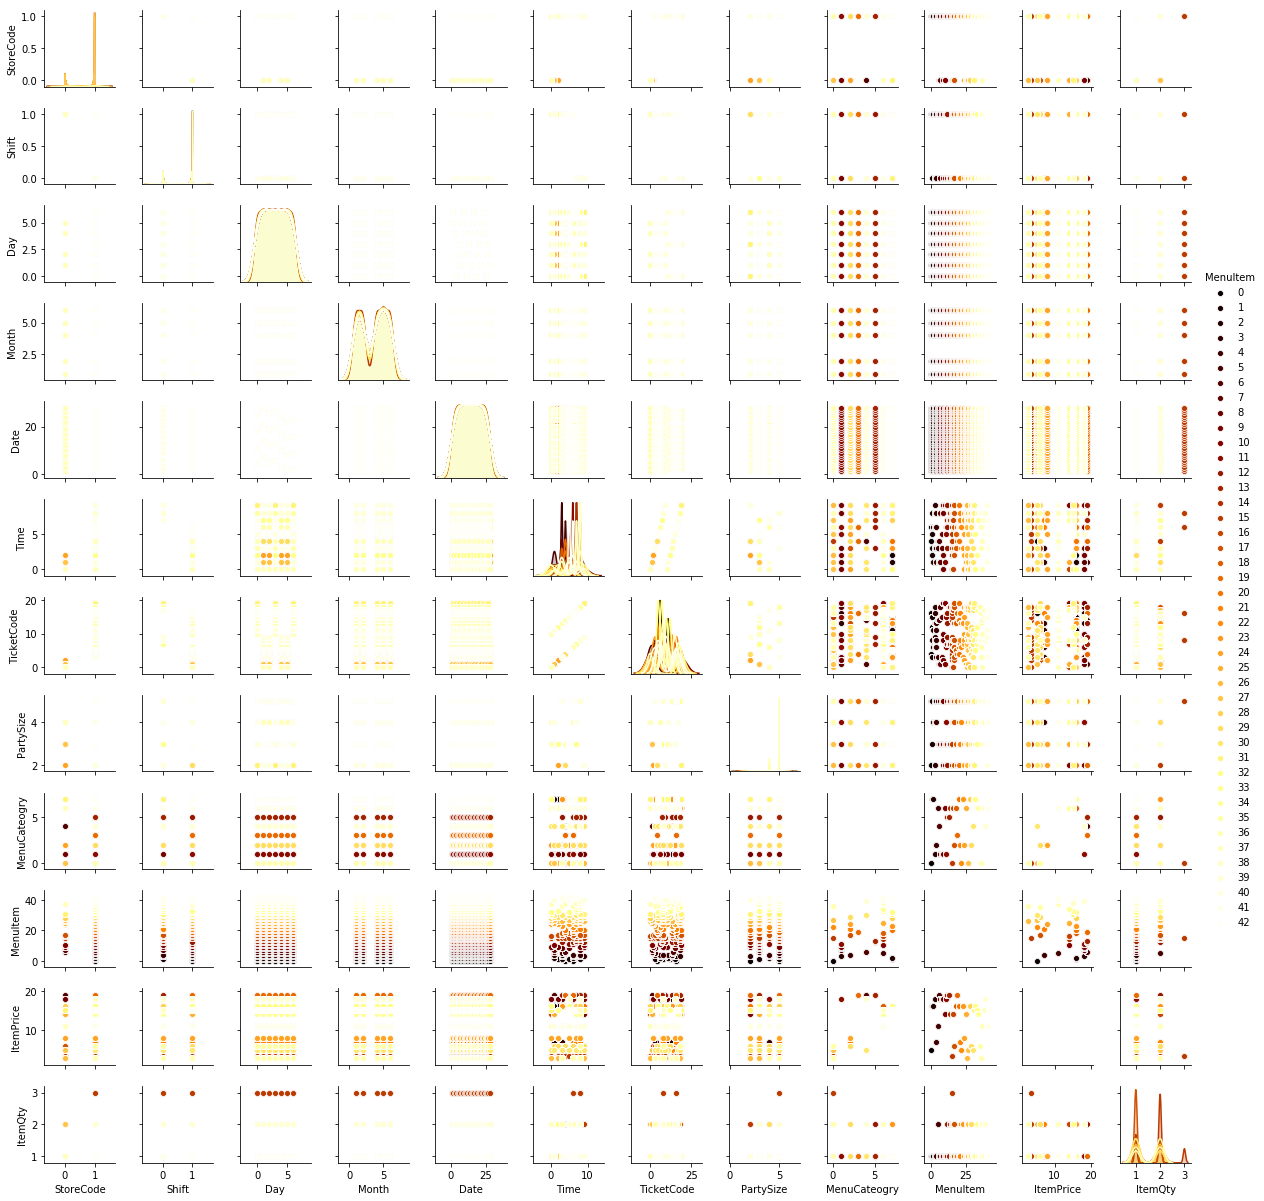

In [ ]:
sns.pairplot(df[['StoreCode', 'Shift', 'Day', 'Month', 'Date', 'Time', 'TicketCode','PartySize', 
                 'MenuCateogry', 'MenuItem', 'ItemPrice', 'ItemQty']], hue='MenuItem', palette='afmhot',size=1.4)

In [ ]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(df[['StoreCode', 'Shift', 'Day', 'Month', 'Date', 'Time', 
                         'TicketCode','PartySize', 'MenuCateogry', 'MenuItem', 
                         'ItemPrice', 'ItemQty']], hue='MenuItem', palette='tab20',size=6)
g.set(xticklabels=[]);

C:\Users\RetailAdmin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


In [ ]:
# Pearson Correlation

str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df.columns.difference(str_list) 
# Create Dataframe containing only numerical features
df_num = df[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(df_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(df_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

# Significant Feature Ranking


In [ ]:
from IPython.display import Image
Image( "Menu Item.jpg", width=1000, height=4000)

In [ ]:
# Extract the input variable and target variable
X = df[['StoreCode', 'Shift', 'Day', 'Month', 'Time', 'TicketCode',
       'PartySize', 'MenuCateogry', 'ItemPrice', 'ItemQty']]  # 'Date',

y = df['MenuItem']

In [ ]:
# split original data [i.e X and y] into 70:30 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_test_pred = dt.predict(X_test)

print("Decision Tree Regressor accuracy_score is:", metrics.r2_score(y_test, y_test_pred))


In [ ]:
y_test[0:10]

In [ ]:
y_test_pred[0:10]

In [ ]:
# Random Forest Regressor
dt = RandomForestRegressor(n_estimators = 51)
dt.fit(X_train, y_train)
y_test_pred = dt.predict(X_test)

print("Random Forest Regressor accuracy_score is:", metrics.r2_score(y_test, y_test_pred))


In [ ]:
# K-Neighbors Regressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)

print("K-Neighbors Regressor accuracy_score is:", metrics.r2_score(y_test, y_test_pred))


In [ ]:
y_test[0:10]

In [ ]:
y_test_pred[0:10]

# Conclution: 

The results as per the Accuracy for Decision Tree, Random Forest and K-Nearest Neighbor Regressor  are 92.44%, 92.25% and 88.45%.

The comparative results show that Decision Tree and Random Forest Regressor perform better than K-Nearest Neighbor.
